# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

plt.style.use("default")
sns.set_theme()

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("../ai4i_raw/ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Kolom yang digunakan adalah sebagai berikut:

- Air Temperature [K]

- Process Temperature [K]

- Rotational Speed [rpm]

- Torque [Nm]

- Tool Wear [min]

- Machine Failure

Pada tahap ini, dilakukan visualisasi untuk melihat pola dan tren pada data sensor, serta mengidentifikasi hubungan (korelasi) antara kondisi operasional mesin dan kejadian kegagalan mesin (machine failure). Selain itu, EDA juga mencakup proses pendeteksian anomali yang berpotensi menjadi indikasi awal terjadinya masalah atau kerusakan pada peralatan.

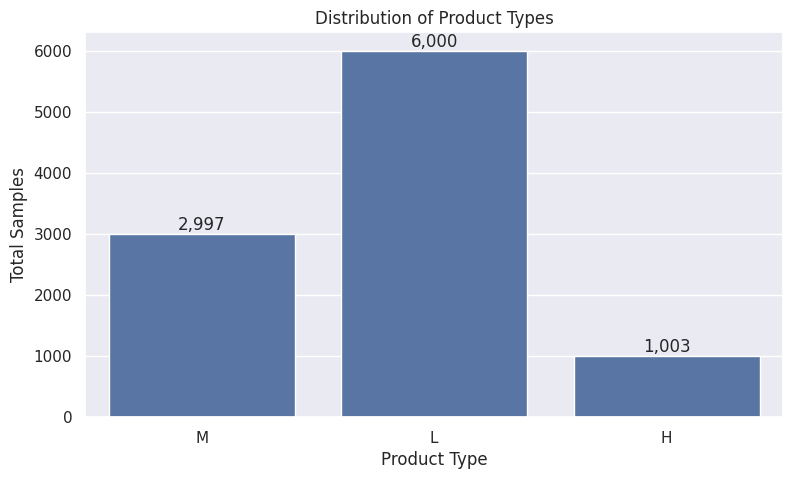

In [6]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x="Type")

ax.set_title("Distribution of Product Types")
ax.set_xlabel("Product Type")
ax.set_ylabel("Total Samples")

for bar in ax.patches:
    value = int(bar.get_height())
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        value,
        f"{value:,}",
        ha="center",
        va="bottom"
    )

plt.show()

**Analisis Bar Chart Jumlah Tipe Produk**

- Product Type L: 6.000 data (60%)

- Product Type M: 2.997 data (30%)

- Product Type H: 1.003 data (10%)

Terlihat bahwa **Product Type L memiliki jumlah data paling dominan** dalam dataset.

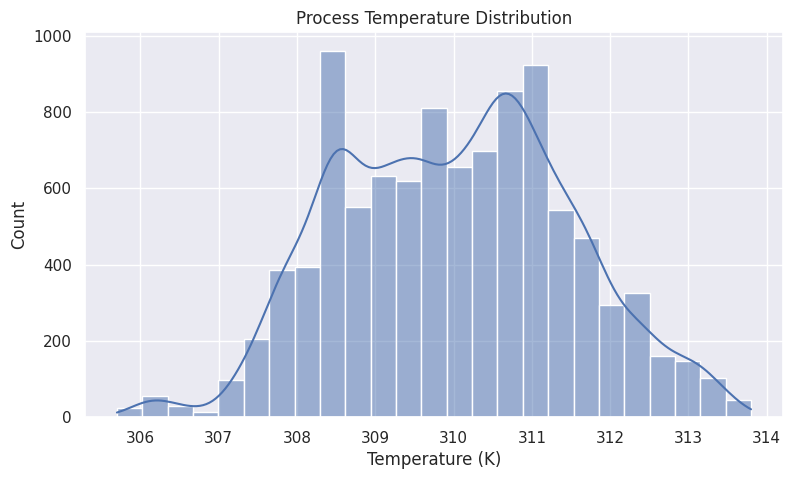

In [7]:
plt.figure(figsize=(9, 5))
sns.histplot(
    df["Process temperature [K]"],
    bins=25,
    kde=True
)

plt.title("Process Temperature Distribution")
plt.xlabel("Temperature (K)")
plt.ylabel("Count")
plt.show()

**Analisis Histogram Distribusi Process Temperature**

- Sumbu X (Process Temperature [K]): rentang suhu proses antara 306–314 K

- Sumbu Y (Frekuensi): jumlah kemunculan tiap interval suhu hingga sekitar 800

Sebagian besar suhu proses berada di kisaran tengah. Hal ini mengindikasikan **suhu proses relatif stabil dengan variasi alami yang wajar**, sehingga mencerminkan konsistensi dalam pengendalian suhu proses.

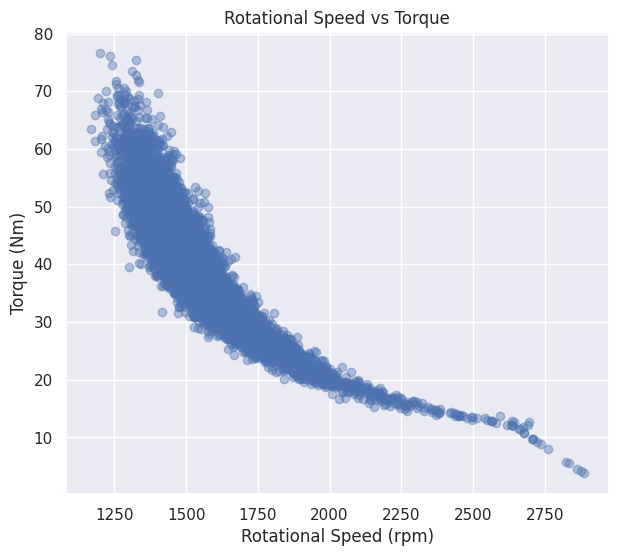

In [8]:
plt.figure(figsize=(7, 6))
plt.scatter(
    df["Rotational speed [rpm]"],
    df["Torque [Nm]"],
    alpha=0.4
)

plt.title("Rotational Speed vs Torque")
plt.xlabel("Rotational Speed (rpm)")
plt.ylabel("Torque (Nm)")
plt.show()

**Analisis Scatter Plot Rotational Speed vs. Torque**

Grafik “Rotational Speed vs. Torque” menunjukkan **hubungan antara kecepatan putar mesin (rpm) dan torsi (Nm)**.

- Sumbu X merepresentasikan rotational speed dengan kisaran sekitar 1.250 hingga 2.750 rpm.

- Sumbu Y menunjukkan nilai torque yang berada pada rentang 0 sampai 80 Nm.

Pola sebaran titik membentuk tren menurun, artinya **semakin tinggi rotational speed, nilai torque cenderung semakin rendah**. Hubungan ini lazim ditemukan pada sistem mekanik, khususnya pada mesin atau motor, di mana peningkatan kecepatan biasanya diikuti oleh penurunan torsi.

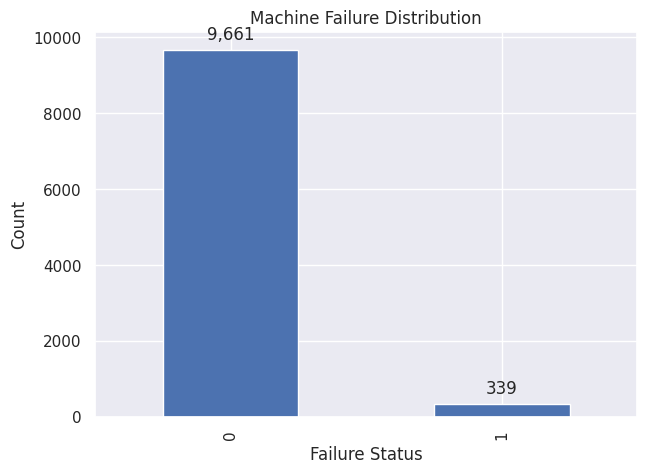

In [13]:
plt.figure(figsize=(7, 5))
ax = df["Machine failure"].value_counts().plot(kind="bar")

ax.set_title("Machine Failure Distribution")
ax.set_xlabel("Failure Status")
ax.set_ylabel("Count")

for bar in ax.patches:
    value = int(bar.get_height())
    ax.annotate(
        f"{value:,}",
        (bar.get_x() + bar.get_width() / 2, value),
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points"
    )

plt.show()

**Analisis Histogram Distribusi Machine Failure**

Histogram menunjukkan adanya **ketidakseimbangan kelas yang cukup jelas pada data kegagalan mesin**. Tercatat 9.661 data tanpa kegagalan mesin (No), sementara hanya 339 data dengan kegagalan mesin (Yes). Hal ini menandakan bahwa **kejadian machine failure relatif jarang dibandingkan kondisi normal**.

Ketidakseimbangan ini penting diperhatikan karena dapat menyebabkan model machine learning cenderung memprediksi kelas mayoritas (No) dan kurang akurat dalam mengenali kelas minoritas (Yes). Oleh karena itu, diperlukan penanganan khusus agar model dapat belajar secara lebih seimbang.

Penanganan ketidakseimbangan data ini akan dilakukan pada tahap Feature Engineering selanjutnya.

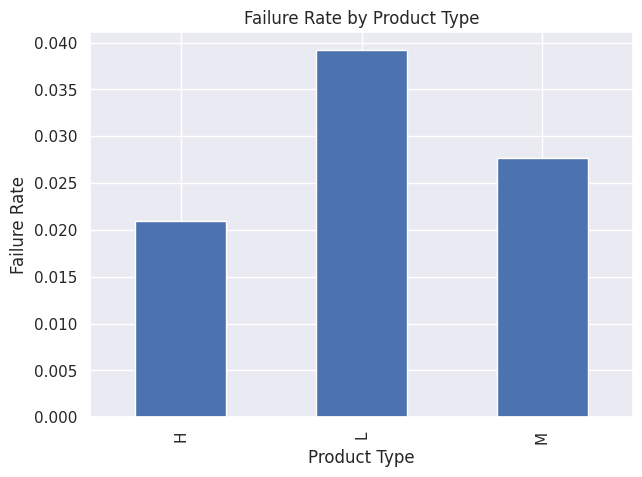

In [14]:
failure_ratio = df.groupby("Type")["Machine failure"].mean()

plt.figure(figsize=(7, 5))
failure_ratio.plot(kind="bar")

plt.title("Failure Rate by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Failure Rate")
plt.show()

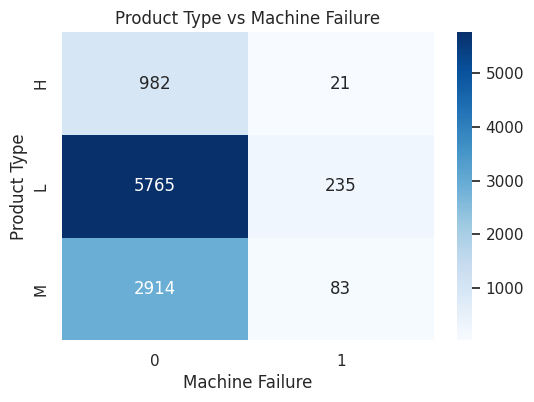

In [15]:
pivot_table = pd.crosstab(df["Type"], df["Machine failure"])

plt.figure(figsize=(6, 4))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.title("Product Type vs Machine Failure")
plt.xlabel("Machine Failure")
plt.ylabel("Product Type")
plt.show()

**Analisis Heatmap Tipe Produk vs. Machine Failure**

Heatmap ini menggambarkan hubungan antara tipe produk (H, M, L) dan kejadian machine failure.

- Sumbu Y menunjukkan tipe produk (H, L, M).

- Sumbu X menunjukkan status machine failure, yaitu 0 (tidak gagal) dan 1 (gagal).

Intensitas warna mencerminkan jumlah kejadian, di mana **warna yang lebih gelap menandakan frekuensi yang lebih tinggi**, disertai angka jumlah data pada tiap sel.

Hasil Pengamatan:

- Product Type H memiliki tingkat kegagalan paling rendah

Tidak gagal: 982

Gagal: 21

- Product Type M menunjukkan tingkat kegagalan menengah

Tidak gagal: 2.914

Gagal: 83

- Product Type L memiliki jumlah kegagalan paling tinggi

Tidak gagal: 5.765

Gagal: 235

Insight:
Terlihat bahwa **produk dengan kualitas lebih tinggi cenderung lebih andal dan jarang mengalami kegagalan mesin**. Sebaliknya, **produk berkualitas rendah memiliki risiko kegagalan yang lebih besar**.

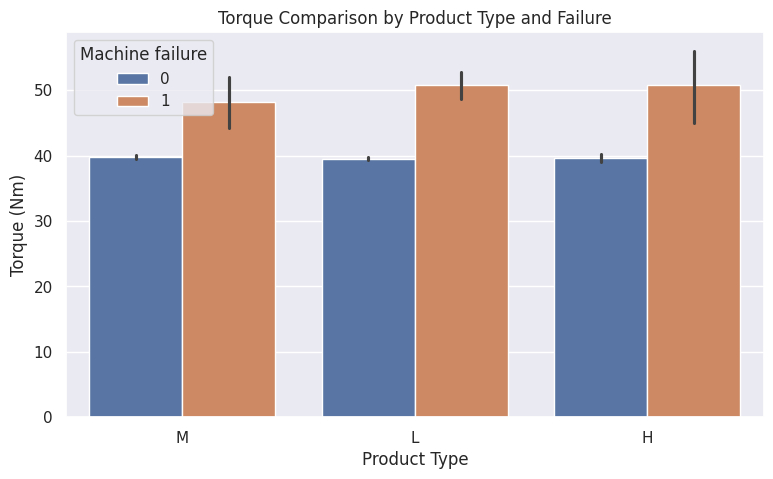

In [16]:
plt.figure(figsize=(9, 5))
sns.barplot(
    data=df,
    x="Type",
    y="Torque [Nm]",
    hue="Machine failure"
)

plt.title("Torque Comparison by Product Type and Failure")
plt.xlabel("Product Type")
plt.ylabel("Torque (Nm)")
plt.show()

**Analisis Torque berdasarkan Tipe Produk dan Machine Failure**

Grafik ini membandingkan nilai torque pada setiap tipe produk (kualitas) antara kondisi tanpa kegagalan mesin dan dengan kegagalan mesin.

Secara umum, nilai torque cenderung lebih tinggi saat terjadi machine failure, yang menunjukkan bahwa **kondisi mesin sangat memengaruhi performa produk**.

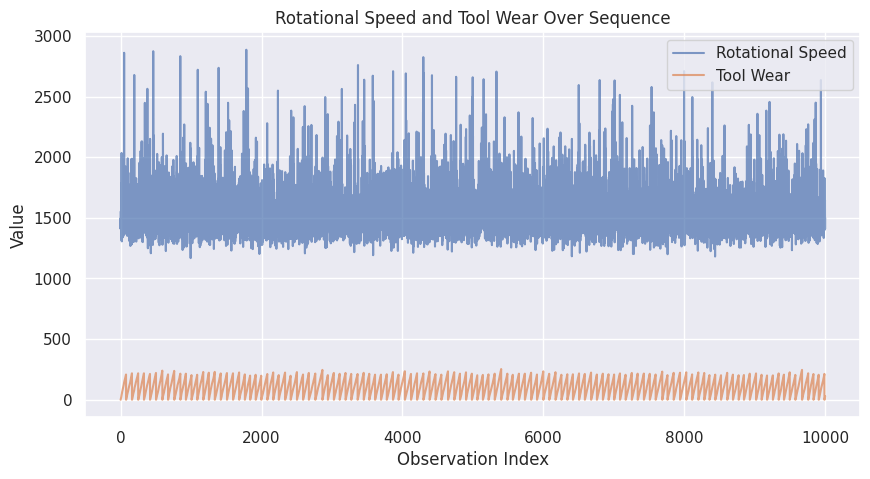

In [17]:
plt.figure(figsize=(10, 5))

plt.plot(
    df.index,
    df["Rotational speed [rpm]"],
    label="Rotational Speed",
    alpha=0.7
)

plt.plot(
    df.index,
    df["Tool wear [min]"],
    label="Tool Wear",
    alpha=0.7
)

plt.title("Rotational Speed and Tool Wear Over Sequence")
plt.xlabel("Observation Index")
plt.ylabel("Value")
plt.legend()
plt.show()

**Analisis Rotational Speed dan Tool Wear terhadap Waktu**

Grafik ini menunjukkan hubungan antara rotational speed dan tool wear sepanjang waktu. Garis biru (rotational speed) terlihat sangat fluktuatif dengan banyak lonjakan, yang mencerminkan perubahan kondisi operasi mesin seperti beban dan pengaturan kecepatan.

Sebaliknya, garis oranye (tool wear) memperlihatkan pola yang lebih halus dan stabil. Hal ini menunjukkan bahwa **keausan alat meningkat secara bertahap dan tidak berubah secara drastis dalam jangka pendek**. Pola tersebut sesuai dengan karakteristik tool wear yang umumnya bertambah perlahan seiring waktu penggunaan, dibandingkan perubahan cepat pada rotational speed.

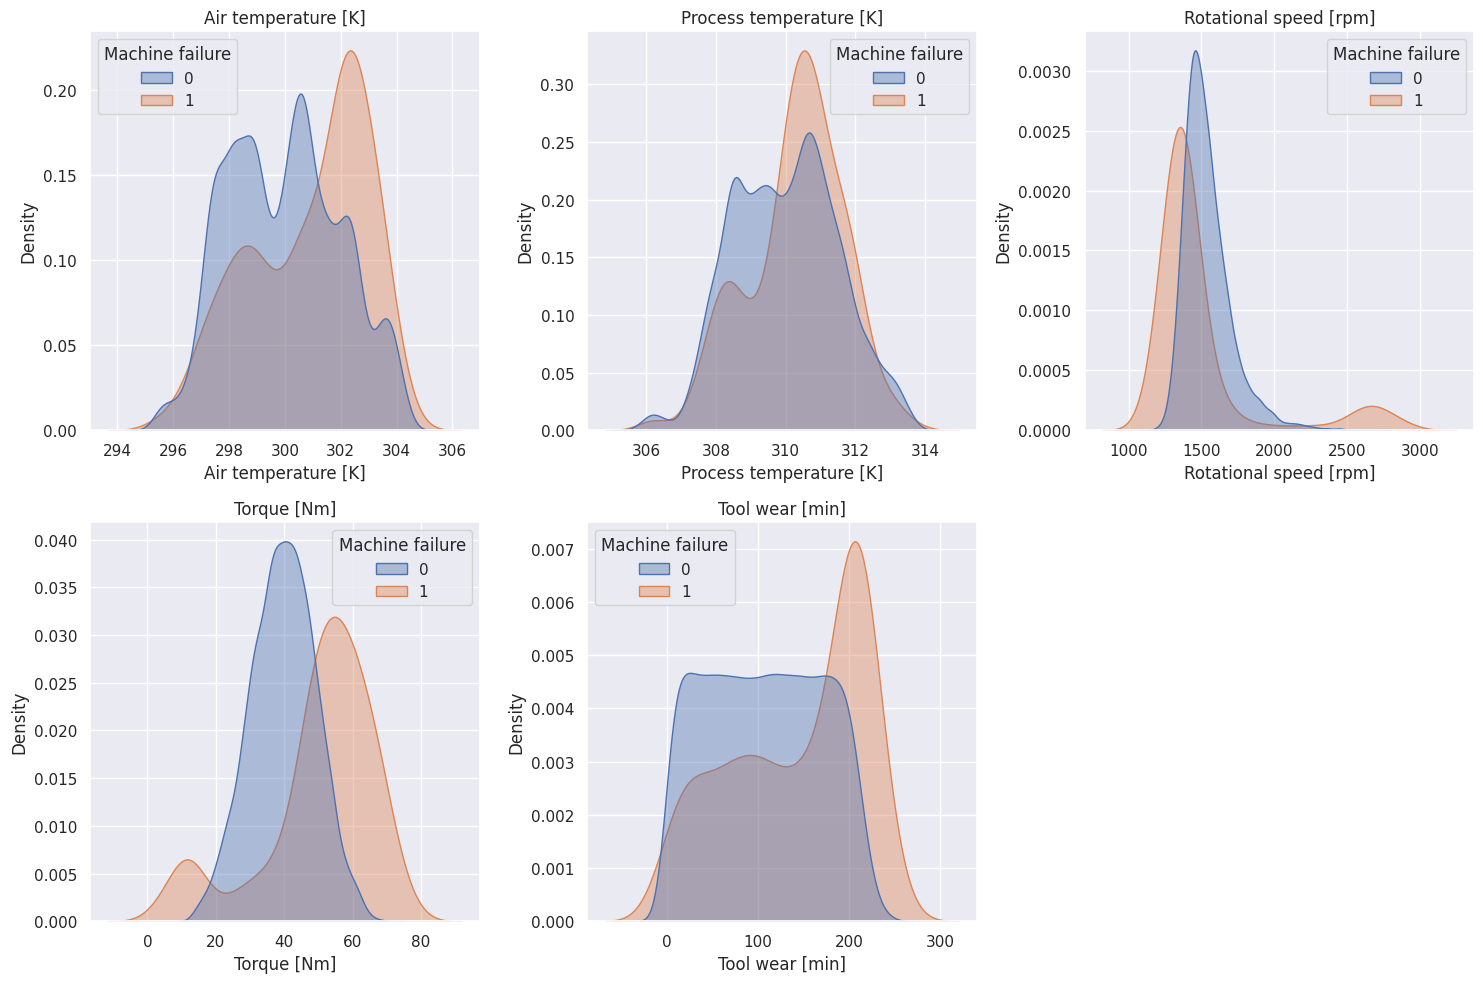

In [18]:
sensor_cols = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]"
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(sensor_cols, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(
        data=df,
        x=col,
        hue="Machine failure",
        fill=True,
        common_norm=False,
        alpha=0.4
    )
    plt.title(col)

plt.tight_layout()
plt.show()

**Early Warning Insight**

Terlihat adanya pergeseran distribusi nilai sensor pada kondisi machine failure dibandingkan kondisi normal. Beberapa variabel seperti tool wear, torque, rotational speed, dan process temperature menunjukkan nilai yang cenderung lebih tinggi sebelum kegagalan terjadi. Pergeseran ini dapat dimanfaatkan sebagai early warning signal, di mana **perubahan pola sensor yang mulai menjauh dari kondisi normal menandakan meningkatnya risiko kegagalan mesin**.

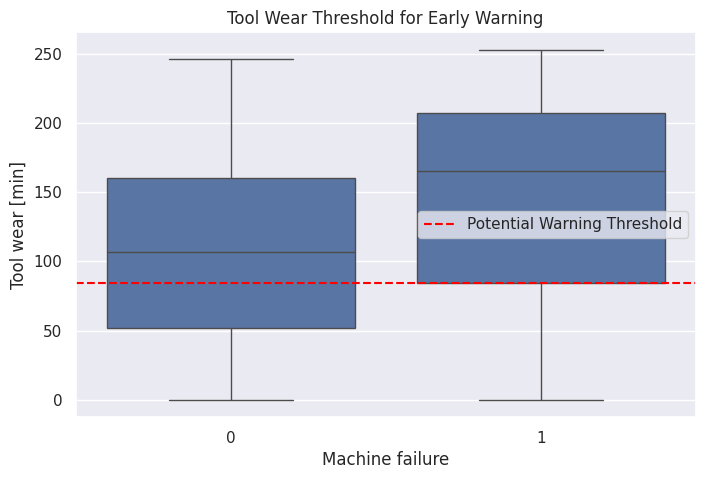

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="Machine failure",
    y="Tool wear [min]"
)

plt.axhline(
    df[df["Machine failure"] == 1]["Tool wear [min]"].quantile(0.25),
    color="red",
    linestyle="--",
    label="Potential Warning Threshold"
)

plt.legend()
plt.title("Tool Wear Threshold for Early Warning")
plt.show()

**Tool Wear Threshold – Early Warning Analysis**

Boxplot menunjukkan bahwa tool wear pada kondisi failure (1) secara umum lebih tinggi dibandingkan kondisi normal (0). Garis putus-putus merah merepresentasikan kuartil bawah (Q1) tool wear pada kondisi failure, yang dapat dijadikan ambang batas early warning.

**Jika nilai tool wear mulai melewati threshold ini, meskipun mesin belum gagal, kondisi tersebut sudah mengindikasikan peningkatan risiko kerusakan**. Temuan ini mendukung penerapan rule-based early alert, di mana peringatan dapat diberikan berdasarkan batas nilai sensor tertentu, tanpa harus sepenuhnya bergantung pada model machine learning.

/home/nurai/Eksperimen_SML_NurAiniFadillah/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


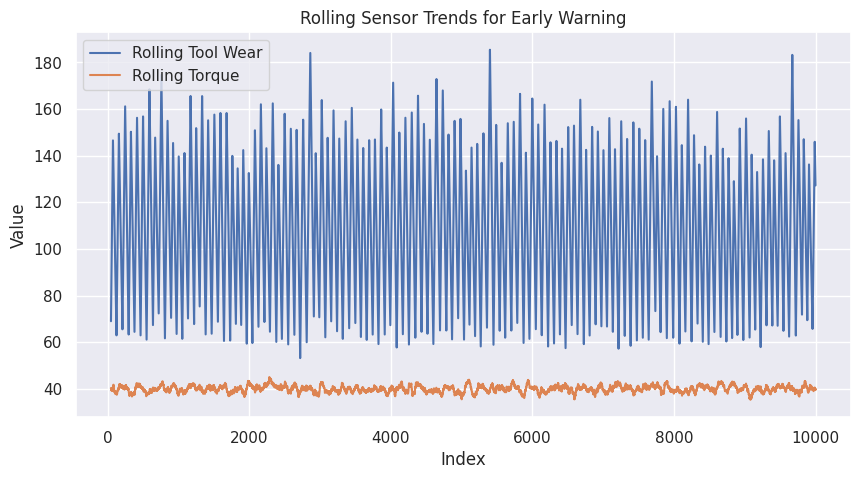

In [20]:
window = 50

df["rolling_tool_wear"] = df["Tool wear [min]"].rolling(window).mean()
df["rolling_torque"] = df["Torque [Nm]"].rolling(window).mean()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["rolling_tool_wear"], label="Rolling Tool Wear")
plt.plot(df.index, df["rolling_torque"], label="Rolling Torque")

plt.title("Rolling Sensor Trends for Early Warning")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

**Analisis Rolling Sensor Trends (Window = 50)**

Rolling mean digunakan untuk menghaluskan data sensor dan melihat pola tren.

- Rolling Tool Wear menunjukkan fluktuasi periodik tanpa tren kenaikan atau penurunan jangka panjang yang jelas, menandakan kondisi keausan alat relatif stabil.

- Rolling Torque cenderung stabil dengan variasi kecil, menunjukkan beban dan performa mesin berada dalam kondisi normal.

Secara keseluruhan, tidak terlihat indikasi anomali signifikan. Rolling features ini berpotensi digunakan sebagai dasar early warning dengan mendeteksi penyimpangan mendadak dari pola normal.

In [36]:
df["Machine failure"].value_counts(normalize=True)

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

In [37]:
df.groupby("Machine failure")[["Tool wear [min]", "Torque [Nm]", "Process temperature [K]"]].mean()

,Tool wear [min],Torque [Nm],Process temperature [K]
Machine failure,,,
0,106.693717,39.629655,309.995570
1,143.781711,50.168142,310.290265


Hasil analisis menunjukkan bahwa **mesin yang mengalami kegagalan memiliki rata-rata tool wear dan torque yang lebih tinggi dibandingkan mesin normal, serta temperatur proses yang cenderung meningkat**. Hal ini mencerminkan pola kegagalan industri di mana **keausan alat menyebabkan peningkatan gesekan dan beban kerja, yang kemudian memicu kenaikan temperatur dan meningkatkan risiko kegagalan**. Temuan ini mendukung pendekatan early warning system, karena perubahan sensor sudah terlihat sebelum kegagalan terjadi.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [21]:
df.shape

(10000, 16)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
 14  rolling_tool_wear      

In [23]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,rolling_tool_wear,rolling_torque
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,9951.000000,9951.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190,108.096127,39.993056
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355,26.570252,1.396088
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,53.200000,35.338000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,85.700000,39.044000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,107.560000,40.014000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,129.360000,40.950000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,185.440000,45.076000


**Deskripsi Kolom Dataset**

- UID: Nomor identifikasi unik untuk setiap observasi, bernilai dari 1 hingga 10.000.

- Product ID: Kode produk yang terdiri dari huruf L, M, atau H yang merepresentasikan tingkat kualitas: (Setiap kode disertai nomor seri khusus).

L (Low): 50% dari total produk

M (Medium): 30%

H (High): 20%

- Type Jenis produk (L, M, atau H) yang diekstrak dari kolom Product ID.

- Air Temperature [K]: Suhu udara yang dihasilkan melalui proses random walk, kemudian dinormalisasi dengan standar deviasi 2 K di sekitar 300 K.

- Process Temperature [K]: Suhu proses yang dibentuk dari random walk dengan standar deviasi 1 K, lalu ditambahkan ke suhu udara dengan selisih sekitar 10 K.

- Rotational Speed [rpm]: Kecepatan putaran mesin yang dihitung berdasarkan daya 2860 W dan ditambahkan noise berdistribusi normal.

- Torque [Nm]: Nilai torsi yang mengikuti distribusi normal dengan rata-rata 40 Nm dan standar deviasi 10 Nm, tanpa nilai negatif.

- Tool Wear [min]: Lama keausan alat selama proses, di mana variasi kualitas produk menambah durasi keausan:

H: +5 menit

M: +3 menit

L: +2 menit

- Machine Failure (Label)
Label biner yang menunjukkan apakah **kegagalan mesin terjadi (1) atau tidak (0)**. Kegagalan ditentukan jika minimal satu dari lima mode kegagalan berikut terpenuhi:

- Tool Wear Failure (TWF): Kegagalan atau penggantian alat terjadi saat keausan mencapai 200–240 menit. Total terdapat 120 kejadian, terdiri dari 69 penggantian alat dan 51 kegagalan.

- Heat Dissipation Failure (HDF): Terjadi jika selisih suhu udara dan suhu proses < 8,6 K serta kecepatan putar < 1380 rpm (115 data).

- Power Failure (PWF): Terjadi ketika daya aktual (torsi × kecepatan sudut) berada di luar rentang 3500–9000 W (95 data).

- Overstrain Failure (OSF): Kegagalan akibat beban berlebih jika hasil perkalian tool wear dan torsi melebihi batas: (Tercatat pada 98 data).

L: 11.000 minNm

M: 12.000 minNm

H: 13.000 minNm

- Random Failure (RNF): Kegagalan acak dengan probabilitas 0,1% per proses, menghasilkan 5 kejadian dalam dataset.

In [25]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


UDI                         0
Product ID                  0
Type                        0
Air temperature [K]         0
Process temperature [K]     0
Rotational speed [rpm]      0
Torque [Nm]                 0
Tool wear [min]             0
Machine failure             0
TWF                         0
HDF                         0
PWF                         0
OSF                         0
RNF                         0
rolling_tool_wear          49
rolling_torque             49
dtype: int64

In [27]:
print("\nDuplicate Rows:")
df.duplicated().sum()


Duplicate Rows:


np.int64(0)

In [28]:
print("\nUnique Values per Column:")
df.nunique()


Unique Values per Column:


UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
rolling_tool_wear           4322
rolling_torque              3696
dtype: int64

In [30]:
WINDOW = 50

df["rolling_tool_wear"] = (
    df["Tool wear [min]"]
    .rolling(window=WINDOW)
    .mean()
)

df["rolling_torque"] = (
    df["Torque [Nm]"]
    .rolling(window=WINDOW)
    .mean()
)

In [32]:
df[["rolling_tool_wear", "rolling_torque"]] = (
    df[["rolling_tool_wear", "rolling_torque"]]
    .bfill()
)

In [33]:
df["Type"] = df["Type"].map({
    "L": 0,
    "M": 1,
    "H": 2
})

In [34]:
X = df.drop(columns=[
    "UDI",
    "Product ID",
    "Machine failure",
    "TWF", "HDF", "PWF", "OSF", "RNF"
])

y = df["Machine failure"]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)